<a href="https://colab.research.google.com/github/duarteleonardosales/Challenge_Data_Science/blob/main/Seazone_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analise de dados de ocupação e preço de anúncios

# Realizar imports

In [28]:
import pandas as pd
import io
import requests
import seaborn as sns
import numpy as np

# Ler o "CSV"

In [29]:
url_details='https://s3.amazonaws.com/gupy5/production/companies/8683/emails/1642617903284/e5eef080-7957-11ec-aeed-e34631527269/desafio_details.csv'
url_price='https://s3.amazonaws.com/gupy5/production/companies/8683/emails/1642617903282/e1ddd510-7957-11ec-80bf-9d0ec3c24431/desafio_priceav.csv'

request_details=requests.get(url_details).content
df_details=pd.read_csv(io.StringIO(request_details.decode('utf-8')))
df_details.drop('Unnamed: 0', axis=1, inplace=True)

request_price=requests.get(url_price).content
df_price=pd.read_csv(io.StringIO(request_price.decode('utf-8')))
df_price.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)

#print(df_details)
#print(df_price)

# 1) Ordene os bairros em ordem crescente de número de listings

In [30]:
df_details['suburb'].value_counts(ascending=True) #ascending True para ordenar de modo crescente

Centro                 278
Lagoa da Conceição     309
Jurerê                 539
Canasvieiras          1177
Ingleses              2388
Name: suburb, dtype: int64

In [31]:
#VERIFICAR SE TEM NAN NA COLUNA
#df_price['occupied'].isna().unique()

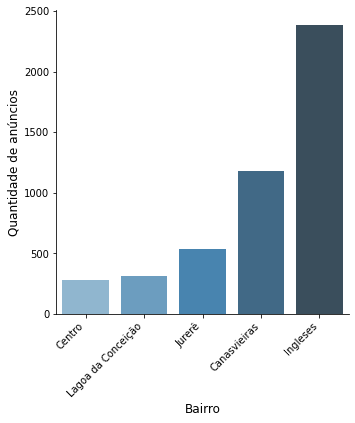

In [32]:
g = sns.catplot(x="suburb", kind="count", data=df_details,
                ci=None, legend_out=False, palette="Blues_d",
                order = df_details['suburb'].value_counts(ascending=True).index)

g.set_xticklabels(rotation=45, horizontalalignment='right')
g.set_axis_labels('Bairro', 'Quantidade de anúncios', fontsize=12)

## Verificar se cada linha representa um único anúncio

In [33]:
if df_details['airbnb_listing_id'].nunique(dropna=False) == df_details['suburb'].value_counts(ascending=True).sum():
  print('OK! Cada linha representa um único anúncio!')

OK! Cada linha representa um único anúncio!


# 2) Ordene os bairros em ordem crescente de faturamento médio dos listings

In [34]:
# Foi verifica que existem linhas duplicadas.
# Não pode haver duas linhas com airbnb_listing_id, booked_on e date iguais.
# Remover linhas duplicadas.

df_price.drop_duplicates(subset=['airbnb_listing_id', 'booked_on', 'date'], inplace= True)

df_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284086 entries, 0 to 289918
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   airbnb_listing_id  284086 non-null  int64  
 1   booked_on          284086 non-null  object 
 2   date               284086 non-null  object 
 3   price_string       284086 non-null  float64
 4   occupied           284086 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 13.0+ MB


In [35]:
# Criar um DF com os anuncios onde houve locação
# Obs.: A coluna "booked_on" é igual a "blank" quando não há locação.
df_alugado = df_price.query("booked_on != 'blank'")
df_alugado = df_alugado[['airbnb_listing_id', 'price_string']]
df_alugado


,airbnb_listing_id,price_string
12,40206270,380.0
13,40206270,380.0
52,40206270,195.0
53,40206270,350.0
54,40206270,350.0
...,...,...
289907,40199361,250.0
289913,40199361,250.0
289916,40199361,250.0
289917,40199361,250.0


In [36]:
#Criar um DF com os IDs e os bairros correspondentes
'''df_new = df_details.merge(df_alugado, on = "airbnb_listing_id", how = "left")
'''
df_id_bairro = df_details[['airbnb_listing_id', 'suburb']]
df_id_bairro

,airbnb_listing_id,suburb
0,31389869,Jurerê
1,40010667,Canasvieiras
2,38905997,Ingleses
3,22343656,Ingleses
4,18328184,Canasvieiras
...,...,...
4686,34392248,Ingleses
4687,44538969,Canasvieiras
4688,16609826,Jurerê
4689,31239515,Canasvieiras


In [37]:
# Criar um novo DF que une IDs (apenas onde há datas alugadas), os preços e os respectivos Bairros

df_merge = df_alugado.merge(df_id_bairro, on = "airbnb_listing_id")
df_merge

# existem 3187 imoveis com occupied = 1

,airbnb_listing_id,price_string,suburb
0,40206270,380.0,Ingleses
1,40206270,380.0,Ingleses
2,40206270,195.0,Ingleses
3,40206270,350.0,Ingleses
4,40206270,350.0,Ingleses
...,...,...,...
132018,40199361,250.0,Canasvieiras
132019,40199361,250.0,Canasvieiras
132020,40199361,250.0,Canasvieiras
132021,40199361,250.0,Canasvieiras


In [38]:
# Criar um DF correpondente ao faturamento médio por bairro
df_faturamento_medio_por_bairro = df_merge.groupby("suburb").mean()
df_faturamento_medio_por_bairro.sort_values('price_string', ascending=True, inplace=True)

# Renomear o preço, já que agora é preço médio
df_faturamento_medio_por_bairro.columns = ['airbnb_listing_id', 'Preço médio']
df_faturamento_medio_por_bairro.index.names = ['Bairro']
df_faturamento_medio_por_bairro['Preço médio'].to_frame()
#df_faturamento_medio_por_bairro

,Preço médio
Bairro,
Centro,218.732420
Lagoa da Conceição,239.889659
Canasvieiras,294.156946
Ingleses,358.260493
Jurerê,409.610886


[Text(0, 0, 'Centro'),
 Text(0, 0, 'Lagoa da Conceição'),
 Text(0, 0, 'Canasvieiras'),
 Text(0, 0, 'Ingleses'),
 Text(0, 0, 'Jurerê')]

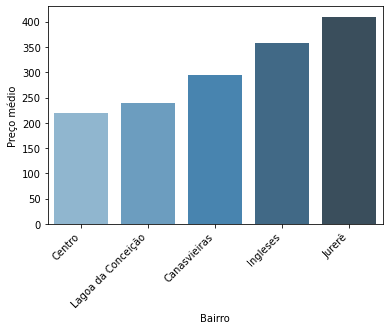

In [39]:
g = sns.barplot(x='Bairro', y='Preço médio',
                data=df_faturamento_medio_por_bairro.reset_index(),
                palette="Blues_d")

g.set_xticklabels(df_faturamento_medio_por_bairro.reset_index()['Bairro'],
                  rotation=45,
                  horizontalalignment='right')

# 3) Existem correlações entre as características de um anúncio e seu faturamento?

Encontrar o faturamento total para cada anúncio *individualmente*

In [40]:
# agrupar pelo ID e somar
df_faturamento_total_por_anuncio = df_merge.groupby("airbnb_listing_id").sum()
df_faturamento_total_por_anuncio = df_faturamento_total_por_anuncio[['price_string']].reset_index()
df_faturamento_total_por_anuncio.columns = ['airbnb_listing_id', 'faturamento']

In [41]:
# unir df_faturamento_total_por_anuncio versus features do anuncio (df_details)
df_merge = df_faturamento_total_por_anuncio.merge(df_details, on = "airbnb_listing_id")

In [42]:
# Criar coluna dicotomicas para cada bairro (para analisar a correlação individualmente)

# Criar uma lista com os bairros que constam no
bairros = df_merge['suburb'].unique()

# Para cada bairro será criada uma coluna com 1 ou 0. 1 representa sim - 0 representa não. 
for i in bairros:
  selecao = df_merge['suburb'].isin([i])
  selecao = selecao.astype(int)
  df_merge[i] = selecao

# Agora a coluna de bairros "suburb" pod ser removida do DataFrame
df_merge.drop('suburb', axis=1, inplace=True)

In [43]:
# Será criada uma lista com palavras chaves. 
# Se alguma dessas palavras constar no campo "ad_name", será criada a uma variável "1". Caso contrário "0" indicando não.
# A ideia é perceber se o que que está sendo anunciado por escrito está correlacionado com o faturamento

lista_keywords = ['cobertura', 'piscina', 'duplex', 'triplex',
                  'decorado', 'privativ', 'ampl', 'panorâmic',
                  'alto padr', 'luxo', 'nobre', 'churrasqueira',
                  'segurança', 'amplo']

pattern = '|'.join(lista_keywords)
df_merge['keywords'] = df_merge['ad_name'].str.contains(pattern, case=False)

# Trocar true/false to 1/0 em keywords
df_merge['keywords'] = df_merge['keywords'].astype(int)

In [44]:
# Trocar true/false to 1/0 em is_superhost
df_merge['is_superhost'] = df_merge['is_superhost'].astype(int)

#selecao para retirar rows com NaN
selecao = ( df_merge['number_of_bedrooms'].notna() ) & ( df_merge['number_of_bathrooms'].notna() ) & ( df_merge['star_rating'].notna() ) & ( df_merge['number_of_reviews'].notna())

df_merge = df_merge[selecao]

In [45]:
# Remover a coluna dos identificadores ID. Nesse momento não são mais necessários
df_merge.drop('airbnb_listing_id', axis=1, inplace=True)

# Fazer as correlações de Pearson
correlacao = df_merge.corr()
correlacao = correlacao.head(1)
correlacao.drop('faturamento', axis=1, inplace=True)

# Renomear colunas para melhorar apresentação
correlacao.columns = ['numero_de_quartos', 'numero_de_banheiros', 'classificacão', 'superhost',
                      'numero_de_review', 'Canasvieiras', 'Ingleses', 'Lagoa da Conceição',
                      'Jurerê', 'Centro', 'keywords']


In [46]:
# Usar um gradiente de cores em "Azul" para indicar quais correlações são mais fortes. Quanto mais escuro mais forte é a correlação de Pearson.
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))

correlacao.style.background_gradient(cmap='Blues', axis=1).set_precision(2)

,numero_de_quartos,numero_de_banheiros,classificacão,superhost,numero_de_review,Canasvieiras,Ingleses,Lagoa da Conceição,Jurerê,Centro,keywords
faturamento,0.21,0.23,0.09,0.09,0.09,-0.07,0.04,-0.08,0.17,-0.11,0.17


# 4) Qual a antecedência média das reservas? Esse número é maior ou menor para finais de semana?

Antecedência é a diferença entre a data de reserva (booked_on) e a data alugada (date)


## Antecedência média das reservas

In [47]:
pd.options.mode.chained_assignment = None  # default='warn'. Em caso de warning, vai printar 

df_alugado = df_price.query("booked_on != 'blank'")


df_alugado['date'] = pd.to_datetime(df_alugado['date'])
df_alugado['booked_on'] = pd.to_datetime(df_alugado['booked_on'])
df_alugado['antecedencia'] = df_alugado['date'] - df_alugado['booked_on']

df_alugado.head(20)

,airbnb_listing_id,booked_on,date,price_string,occupied,antecedencia
12,40206270,2021-01-01,2021-01-01,380.0,1,0 days
13,40206270,2021-01-01,2021-01-02,380.0,1,1 days
52,40206270,2021-02-10,2021-02-10,195.0,1,0 days
53,40206270,2021-02-10,2021-02-11,350.0,1,1 days
54,40206270,2021-02-10,2021-02-12,350.0,1,2 days
56,40206270,2021-02-10,2021-02-13,350.0,1,3 days
58,40206270,2021-02-10,2021-02-14,350.0,1,4 days
60,40206270,2021-02-10,2021-02-15,350.0,1,5 days
61,40206270,2021-02-10,2021-02-16,350.0,1,6 days
62,40206270,2021-02-10,2021-02-17,195.0,1,7 days


In [48]:
def retorna_antecendia(df):
  dias = df.days
  horas = df.seconds/3600
  print(f'A antecedência média das reservas é de {dias} dias e {horas} horas')

In [49]:
# Calcular a média da antecedência média das reservas (de modo geral).

df_antecedencia_media = df_alugado['antecedencia'].mean()
retorna_antecendia(df_antecedencia_media)


A antecedência média das reservas é de 32 dias e 8.465 horas


## Antecedência média das reservas para fins de semana

Considerando apenas reservas feitas para fins de semana


In [50]:
# Reservar para o final de semana (date)
#df_alugado["reservado_para_dia_da_semana"] = df_alugado['date'].dt.dayofweek
df_alugado["reservar_para_fim_de_semana"] = df_alugado['date'].dt.dayofweek > 4

# Antecedência média - Reservar para o final de semana (date)
df_antecedencia_media_fds = df_alugado.query("reservar_para_fim_de_semana == True")['antecedencia'].mean()
retorna_antecendia(df_antecedencia_media_fds)


#df_alugado.head(20)

A antecedência média das reservas é de 32 dias e 10.646666666666667 horas


## **Conclusão**

A antecedência média **geral** das reservas é de 32 dias e 8.465 horas

Quando essa reserva é **feita exclusivamente para os fins de semana**, a antecedência média é de 32 dias e 10.6467 horas.

Portanto a antecedência média **geral** é menor (por pouco) que a antecedência média de reservas **feitas exclusivamente para os fins de semana**.

